In [12]:
# Importamos librerias
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import mplleaflet
import pysal as ps
from PIL import Image
%matplotlib inline

In [2]:
# Cargamos shapes
provincias = gpd.read_file('data/Provincias sin Antartida.shp')

In [3]:
asentamientos = gpd.read_file('data/barrios-populares.shp')

In [4]:
asentamientos.columns

Index(['idrenabap', 'nombreBarr', 'provincia', 'departamen', 'localidad',
       'geometry'],
      dtype='object')

In [5]:
# Asentamientos por provincia
resultados = asentamientos.groupby(['provincia'])[['idrenabap']].count().reset_index()

In [6]:
# Total de asentamientos
resultados.idrenabap.sum()

4228

In [7]:
# Ordenamos los resultados de menor a mayor
sort = resultados.sort_values(by='idrenabap', ascending=True)
sort.provincia.replace(['CIUDAD AUTONOMA DE BUENOS AIRES'],['CABA'], inplace=True)
sort.index = sort.provincia

In [8]:
# Cambiamos el estilo del plot de matplotlib para usar otro fondo
plt.style.use('ggplot')

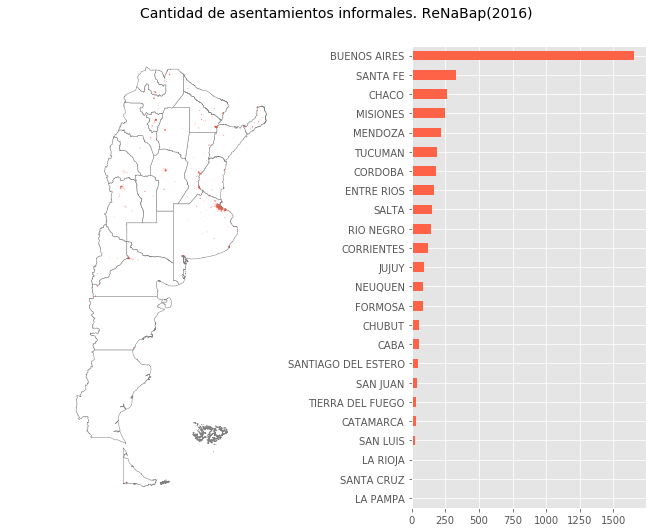

In [9]:
# Ploteamos los asentamientos
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

provincias.to_crs(epsg=3857).plot(color = 'white', edgecolor='grey', ax=ax1)
asentamientos.to_crs(epsg=3857).plot(alpha=0.5,edgecolor='tomato', ax=ax1)
sort.plot(kind='barh',ax=ax2, color='tomato', legend=False)

ax1.set_axis_off()

plt.suptitle('Cantidad de asentamientos informales. ReNaBap(2016)', 
              size=14, y=1.05)

y_axis = ax2.yaxis
y_axis.label.set_visible(False)

plt.tight_layout();

In [10]:
# Hacemos foco en la Region Metropolitana de BSAS
p = asentamientos.copy()
b = p.loc[(p['provincia']=='CIUDAD AUTONOMA DE BUENOS AIRES')|(p['provincia']=='BUENOS AIRES')]

In [11]:
f,ax = plt.subplots(1, figsize=(9,8))
ax =b.plot(alpha=0.5,edgecolor='k',ax=ax)
mplleaflet.display(fig=ax.figure, crs=b.crs, tiles="mapbox bright")